<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/copia_mediapipe_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md#python-solution-api
<br><br>
https://developers.google.com/ml-kit/vision/pose-detection/classifying-poses?hl=pt-br

Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 13.4 MB/s eta 0:00:00


Upload any image that that has a person. We take two example images from the web: https://unsplash.com/photos/v4zceVZ5HK8 and https://unsplash.com/photos/e_rhazQLaSs.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2e729037b9303bdb950fc4aca072be17.jpg to 2e729037b9303bdb950fc4aca072be17.jpg


2e729037b9303bdb950fc4aca072be17.jpg


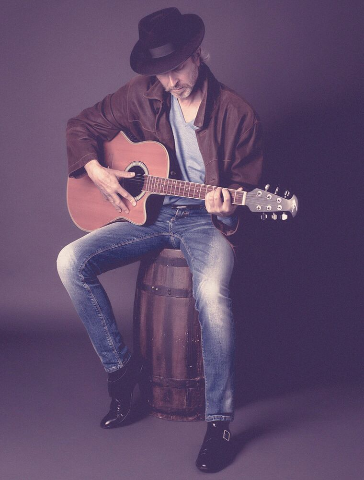

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

Nose coordinates: (360.94241976737976, 180.45979738235474)
Pose landmarks of 2e729037b9303bdb950fc4aca072be17.jpg:


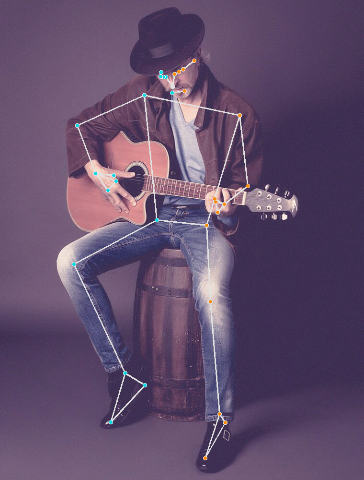

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

Nose world landmark:
x: -0.030035588890314102
y: -0.37786850333213806
z: -0.43678754568099976
visibility: 0.9999498128890991



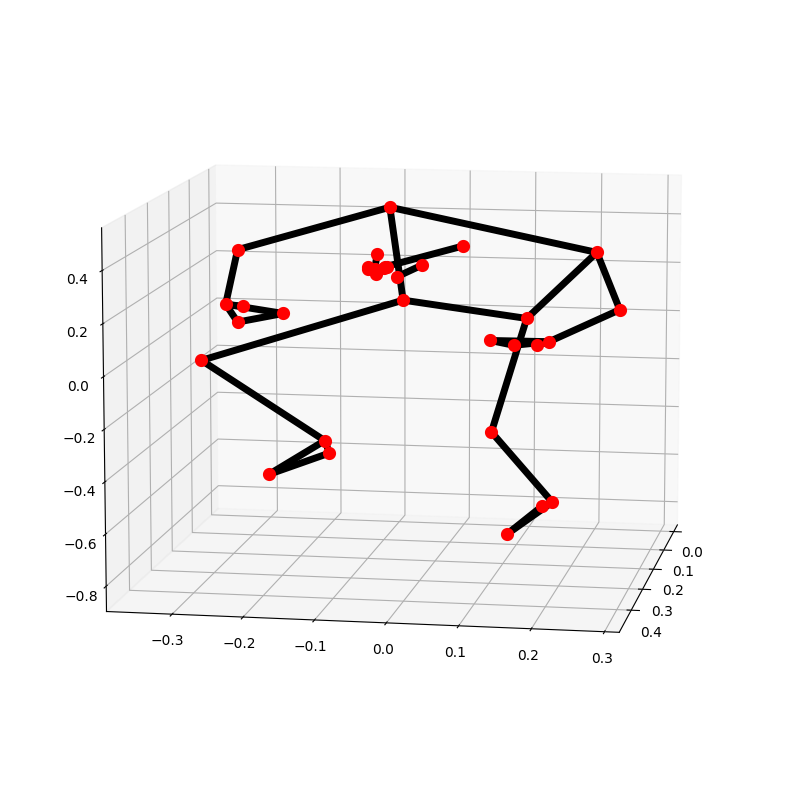

In [ ]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
    
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    break

In [ ]:
# print(results.pose_world_landmarks)
# print(mp_pose.PoseLandmark)
for x in mp_pose.PoseLandmark:
  print(x)
  print('----------------------')
  print(results.pose_world_landmarks.landmark[x])
  print('----------------------')

PoseLandmark.NOSE
----------------------
x: -0.030035588890314102
y: -0.37786850333213806
z: -0.43678754568099976
visibility: 0.9999498128890991

----------------------
PoseLandmark.LEFT_EYE_INNER
----------------------
x: -0.015196627005934715
y: -0.40986284613609314
z: -0.44867196679115295
visibility: 0.9998605251312256

----------------------
PoseLandmark.LEFT_EYE
----------------------
x: -0.013521273620426655
y: -0.40786871314048767
z: -0.43770626187324524
visibility: 0.9997947812080383

----------------------
PoseLandmark.LEFT_EYE_OUTER
----------------------
x: -0.014693868346512318
y: -0.41032958030700684
z: -0.44313451647758484
visibility: 0.9998268485069275

----------------------
PoseLandmark.RIGHT_EYE_INNER
----------------------
x: -0.037366386502981186
y: -0.4127160608768463
z: -0.4523189663887024
visibility: 0.9999040365219116

----------------------
PoseLandmark.RIGHT_EYE
----------------------
x: -0.033219851553440094
y: -0.4111354947090149
z: -0.4668251574039459
visib

In [ ]:
print(mp_pose.PoseLandmark.NOSE)

PoseLandmark.NOSE


In [ ]:
print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP])

x: -0.09373752772808075
y: -0.03461518511176109
z: -0.0014950805343687534
visibility: 0.9998714923858643



Pose segmentation of 2e729037b9303bdb950fc4aca072be17.jpg:


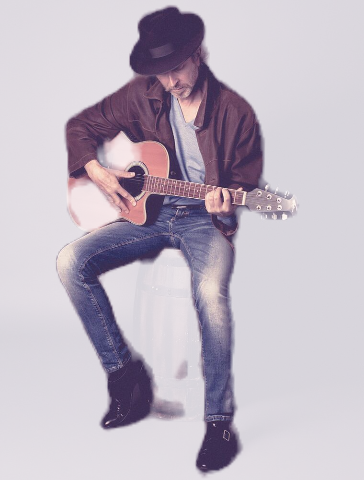

In [ ]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, 
    model_complexity=2, enable_segmentation=True) as pose:
  for name, image in images.items():
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw pose segmentation.
    print(f'Pose segmentation of {name}:')
    annotated_image = image.copy()
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
    resize_and_show(annotated_image)

--- 
<br>
Comparação de poses por angulo...

In [ ]:
# coordenada = (x, y, z)

# ponto1 = ( , , )
# ponto2 = ( , , )
# ponto3 = ( , , )

import numpy as np

RIGHT_HIP = results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP]
RIGHT_KNEE = results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE]
RIGHT_ANKLE = results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE]

RH = np.array([RIGHT_HIP.x , RIGHT_HIP.y , RIGHT_HIP.z])
RK = np.array([RIGHT_KNEE.x , RIGHT_KNEE.y , RIGHT_KNEE.z])
RA = np.array([RIGHT_ANKLE.x , RIGHT_ANKLE.y , RIGHT_ANKLE.z])


vetor1 = RK - RH
vetor2 = RH - RA

prod_escalar = np.dot(vetor1, vetor2)

norm_vet1 = np.linalg.norm(vetor1)
norm_vet2 = np.linalg.norm(vetor2)


angulo_rad = np.arccos(prod_escalar / (norm_vet1 * norm_vet2))

angulo_grau = np.degrees(angulo_rad)

print("O ângulo entre as retas é:", angulo_grau, "graus")

O ângulo entre as retas é: 126.67466751860307 graus


In [ ]:
# https://matematicasimplificada.com/espacos-euclidianos/
u = np.array([1, 1, 1/2])
v = np.array([0, 1, 4])

prod_escal = np.dot(u, v)

norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)


angulo_rad = np.arccos(prod_escal / (norm_u * norm_v))

angulo_grau = np.degrees(angulo_rad)

print("O ângulo entre as retas é:", angulo_rad, "rad")
print("O ângulo entre as retas é:", angulo_grau, "graus")

O ângulo entre as retas é: 1.0643516833813962 rad
O ângulo entre as retas é: 60.98285937539848 graus
